# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [2]:
df1 = pd.read_csv("Iris.csv")
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
df1.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa


# 评估和清理数据

In [4]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


从结构上来看，这个表格内一共有101行，第一行为表格头所以有100行数据，索引0-99，正常，然后也没有空值，id应该是字符串类型，免得后面describe给我们计算东西了萼片花瓣的信息也是float类型，后续我们可以检查下这四行数值数据有没有可能有0长度或者负数长度，因为如果有字符串或者别的类型的话，dtype不会显示float64类型的这个放心，检查有没有<=0的就行然后这个种类species可以换一下数据类型为category，结构上符合每行一个观察对象，每列是他的属性，也是一个变量，每个单元格只有一个东西。

In [5]:
df1["Species"] = df1["Species"].astype("category")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    int64   
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 4.3 KB


接下来是内容性问题

评估和清理空值

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    int64   
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 4.3 KB


可以看到，每列都没有空值

In [8]:
with pd.option_context("display.max_rows",None): #即便没有空缺值也看一看有没有乱打序号的
    print(df1["Id"])

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
30     31
31     32
32     33
33     34
34     35
35     36
36     37
37     38
38     39
39     40
40     41
41     42
42     43
43     44
44     45
45     46
46     47
47     48
48     49
49     50
50     51
51     52
52     53
53     54
54     55
55     56
56     57
57     58
58     59
59     60
60     61
61     62
62     63
63     64
64     65
65     66
66     67
67     68
68     69
69     70
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100


In [9]:
df1["Id"].values.sum()  #可以看到1-100的序号加起来的确是5050,没有乱打的序号

np.int64(5050)

In [10]:
df1["Id"] = df1["Id"].astype(str)

然后看看四个数值数据列的情况，其实这下面这几个除了在看有没有空值，其实本来就没有空值，但是也同步在看是不是有无效的、无理的数据值

In [11]:
df1.query("SepalLengthCm >0")  #可以看到这个萼片长度大于0的基本是全部行，也就是说没有一个是<0或者=0，合理。

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [12]:
df1.query("SepalWidthCm >0")   #宽度呢，也没有一个数据值是<=0的

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [13]:
df1.query("PetalLengthCm >0") #花瓣长度也正常

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [14]:
df1.query("PetalWidthCm	 >0") #花瓣宽度也ok

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


到最后一个种类行了，我们可以通过计算种类的数量来看看是不是有别的东西

In [15]:
df1["Species"].value_counts()  #可以见到没有一个异常的种类，都是50 50

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

接下来评估和清理重复行，这里单看某些列，比如说长度，那肯定某些花在萼片长度是一致的，我们只要看看有没有完全一致的就行，额
那肯定其实是没有的，为什么？因为id都不一样了，怎么可能会有……那么我们把id去掉看看？

In [16]:
df1_quitid = df1.drop(["Id"],axis=1)

In [17]:
df1_quitid

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [18]:
df1_quitid.duplicated().sum()  #居然有两行完全一样？？？这么巧的吗，说明种类一样，数值也一样？

np.int64(2)

In [19]:
df1_quitid[ df1_quitid.duplicated() ]  #查找那两行重复的

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


我再看看这个4.9萼片长度第一次出现在哪里，为了能直接获得这三行，多加点变量

In [20]:
df1_quitid [  (df1_quitid["SepalLengthCm"] == 4.9) & (df1_quitid["SepalWidthCm"] == 3.1)] 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


**评估重复数据结论：在Iris-setosa这个类下，索引为9 34 37 的为重复，当然实际是9是原体，重复的是34和37，考虑到也许真的有可能真有三株花的这些数据都一样，序号不一
那么就不删除重复的34和37的数据行了。**

处理不一致数据

In [21]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.3+ KB


id这一列下我们看过了，不存在序号不对的情况，四个数值数据也没有问题的，可能存在不一致数据的只有在species里，但是我们前面也看了看它
里面变量的计数了，两个类刚好都是50，因此不一致数据这边没问题

处理无效数据

无效数据，在数值数据列下我们都看了没有小于等于0的不正常数据，序号也没问题，分类数据也没问题，因此评估和清理结束，结构、内容上都处理好了

In [23]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.3+ KB


In [25]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


保存数据

In [26]:
cleaned_data = df1.copy()

In [27]:
cleaned_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### 整理数据，因为我们是分两组去进行，两个总体嘛，因此整理数据就是先分组，分两边

In [28]:
setosa_group = cleaned_data.query("Species == 'Iris-setosa'")

In [29]:
setosa_group

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
versicolor_group = cleaned_data.query("Species == 'Iris-versicolor'")

In [31]:
versicolor_group

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索`Setosa`和`Versicolor`这两种鸢尾花的变量特点。

可视化探索可以帮我们对数据有一个更直观的理解，比如了解数据的分布、发现变量之间的关系，等等，从而为后续的进一步分析提供方向。

在这里，分类数据只有species这一列，而且都是50 50，单纯的看分类的图，没什么用，而且也只有一个分类数据列，也不用看两两关系了，因为只有一列呀

，那么针对数值，我们可以直接绘制成对图，利用其中的密度图查看不同变量的分布，以及利用散点图了解变量之间的关系。

并且，由于此次分析目的是了解不同种类鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不种类类的样本进行分类。

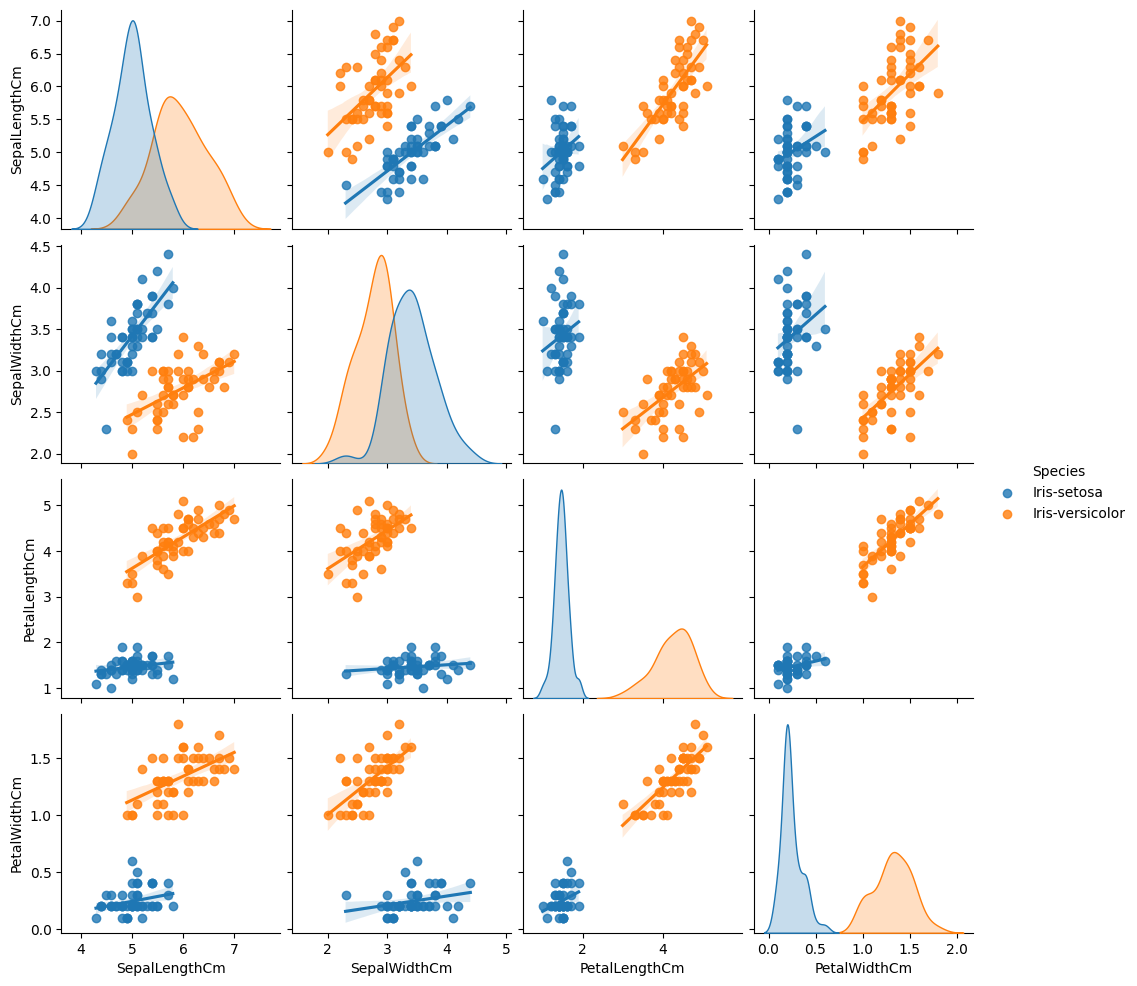

In [32]:
sns.pairplot(cleaned_data,hue = "Species",kind = "reg")
plt.show()

简单总结一下，在这个图中，我们可以看到花瓣的长度和宽度这两个密度图，versicolor这一类的鸢尾花比setosa鸢尾花要长一点的，花瓣长度和宽度都长，
因为图中表面的差异很明显，在两个图中都有一个很明显的界线，很小概率会是随机导致的结果，因此我们可以先提前下一个结论，假设检验的结果是
这两种鸢尾花在花瓣长度以及宽度上有明显的差异。但是萼片的长度和宽度，这两种鸢尾花就出现了重叠的现象，那我们还无法从图中得到结论。因此我们的假设检验
就应该是检验四次，是每个数值之间都得检验。

## 分析数据

在这里，我们选择t检验，其实z也是可以的，但是50说样本也不是很大，虽然大于30，但还是不是显著的大，因此选择t检验，那么符合t检验的要求吗？
要求两两独立，然后基本呈正态分布，那也是没问题的这里，我们都用t检验

### SepalLengthCm 萼片长度

在做每一次检验前，我们都可以绘制相应的图来看一看

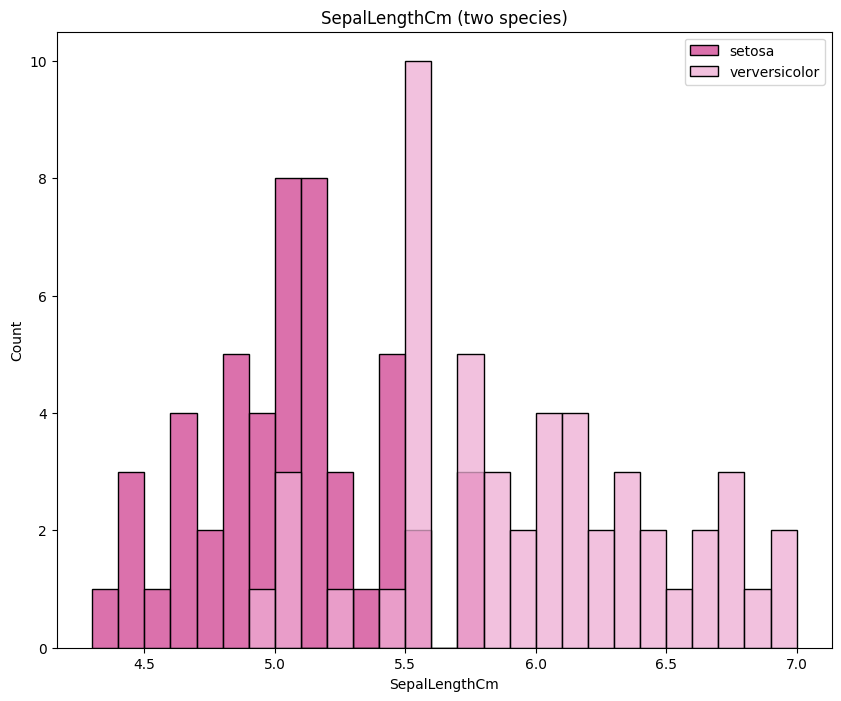

In [33]:
plt.figure(figsize=(10,8))
sns.set_palette("PiYG")
sns.histplot(setosa_group["SepalLengthCm"],binwidth=0.1,label="setosa")
sns.histplot(versicolor_group["SepalLengthCm"],binwidth=0.1,label="verversicolor")
plt.legend()
plt.title("SepalLengthCm (two species)")
plt.show()

#### 建立假设


$H_{0}$  setosa与versicolor两类鸢尾花的萼片长度平均值没有显著差异

$H_{1}$  setosa与versicolor两类鸢尾花的萼片长度平均值有显著差异

#### 确定单双尾检验

因为只看有没有显著差异，因此选择双尾检验

#### 确定显著水平

显著水平在双尾应该是0.05，百分之五的概率是原假设为真

#### 计算t值与p值

In [34]:
t_value_epianchangdu,p_value_epianchangdu = ttest_ind(setosa_group["SepalLengthCm"],versicolor_group["SepalLengthCm"])
print(
    f"t值：{t_value_epianchangdu} \np值：{p_value_epianchangdu}"
)

t值：-10.52098626754911 
p值：8.985235037487079e-18


**结论**

**因为显著水平为0.05，这个p值远远小于显著水平，p值的数字是大约9的-18次方，是科学计数法表示的。
因为p值越小，表示在假定总体参数之间没有显著差异，发生目前这样的差异或是更大的差异是很小的事情，但还是发生了，也就是没有差异的概率很小
因此拒绝原假设。**

**setosa鸢尾花和versicolor鸢尾花在萼片长度上有显著差异**

### SepalWidthCm 萼片宽度

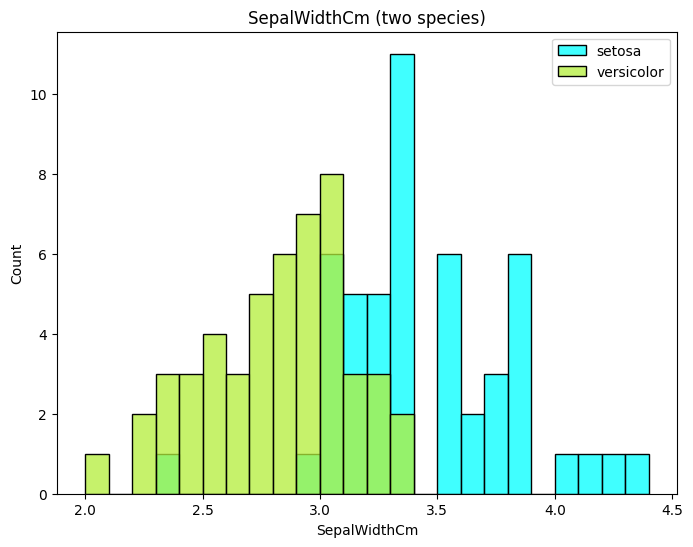

In [35]:
plt.figure(figsize=(8,6))
#sns.set_palette("coolwarm")
sns.histplot(setosa_group["SepalWidthCm"],binwidth=0.1,label="setosa",color="#00FFFF")
sns.histplot(versicolor_group["SepalWidthCm"],binwidth=0.1,label="versicolor",color="#B3EE3A")
plt.title("SepalWidthCm (two species)")
plt.legend()
plt.show()

### 建立假设

$H_0$ setosa鸢尾花与versicolor鸢尾花在萼片宽度平均值上没有显著差异

$H_1$ setosa鸢尾花与versicolor鸢尾花在萼片宽度平均值上有显著差异

### 确定单双尾

因为是只需要确定有没有差异，因此选择`双尾检验`

### 确定显著水平

由于是双尾检验，因此显著水平为0.5

### 计算t值和p值

In [36]:
t_value_epiankuandu , p_value_epiankuandu = ttest_ind(setosa_group["SepalWidthCm"],versicolor_group["SepalWidthCm"])
print(
    f"t值：{t_value_epiankuandu} \np值：{p_value_epiankuandu}"
)

t值：9.282772555558111 
p值：4.362239016010214e-15


### **结论**

**由于p值远远小于显著水平0.05，因此我们说原假设不存在显著差异是错的，拒绝原假设**

**setosa和versicolor两种鸢尾花在萼片宽度均值上存在明显差异**

### PetalLengthCm 花瓣长度

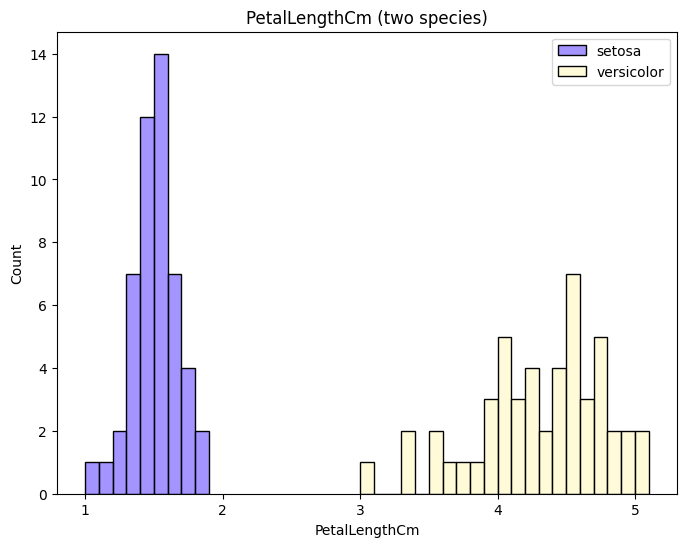

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(setosa_group["PetalLengthCm"],binwidth=0.1,label="setosa",color="#8470FF")
sns.histplot(versicolor_group["PetalLengthCm"],binwidth=0.1,label="versicolor",color="#FFFACD")
plt.title("PetalLengthCm (two species)")
plt.legend()
plt.show()  #这一看就很明显有差异啊，平均值一个在1-2之间，一个在4左右，那很明显两个总体之间的花瓣长度均值有很显著的差异

#### 建议假设

$H_0$    setosa和versicolor鸢尾花在花瓣长度平均值上没有显著差异

$H_1$    setosa和versicolor鸢尾花在花瓣长度平均值有显著差异

#### 单尾还是双尾

`双尾检验`

#### 确定显著水平

显著水平确定为0.05，因为是双尾检验

#### 计算t值和p值

In [38]:
t_value_huabanchangdu , p_value_huabanchangdu = ttest_ind(setosa_group["PetalLengthCm"],versicolor_group["PetalLengthCm"])
print(
    f"t值：{t_value_huabanchangdu} \np值：{p_value_huabanchangdu}"
    
)

t值：-39.46866259397272 
p值：5.717463758170621e-62


#### 结论

p值远远小于0.05显著水平，因此原假设没有差异的概率极小，因此拒绝原假设，说明setosa和versicolor鸢尾花在花瓣长度均值上有很明显的差异！！！

### PetalWidthCm  花瓣宽度

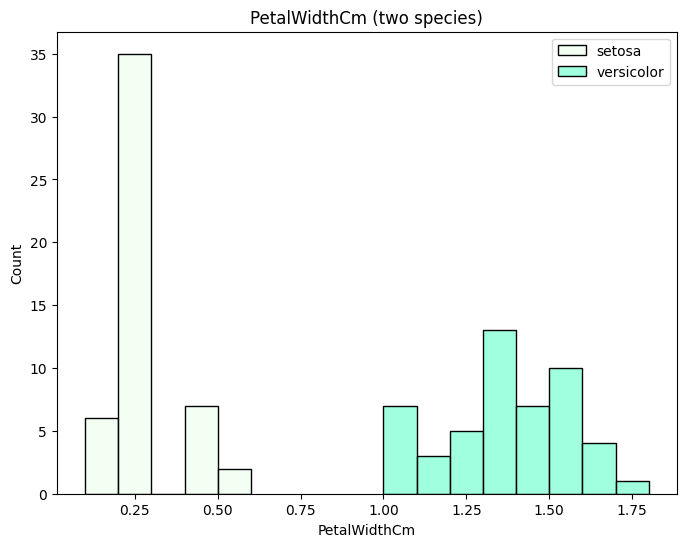

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(setosa_group["PetalWidthCm"],binwidth=0.1,label="setosa",color="#F0FFF0")
sns.histplot(versicolor_group["PetalWidthCm"],binwidth=0.1,label="versicolor",color="#7FFFD4")
plt.title("PetalWidthCm (two species)")
plt.legend()
plt.show()

#### 建议假设

$H_0$    setosa和versicolor鸢尾花在花瓣宽度平均值上没有显著差异

$H_1$    setosa和versicolor鸢尾花在花瓣宽度平均值有显著差异

#### 单尾还是双尾

`双尾检验`

#### 确定显著水平

显著水平确定为0.05，因为是双尾检验

#### 计算t值和p值

In [40]:
t_value_huabankuandu , p_value_huabankuandu = ttest_ind(setosa_group["PetalWidthCm"],versicolor_group["SepalWidthCm"])
print(
    f"t值：{t_value_huabankuandu} \np值：{p_value_huabankuandu}"
    
)

t值：-53.863495607082015 
p值：1.2839782345701052e-74


#### 结论

p值远远小于0.05显著水平，因此原假设没有差异的概率极小，因此拒绝原假设，说明setosa和versicolor鸢尾花在花瓣宽度均值上有很明显的差异！！！

# 结论

### **setosa和versicolor两种鸢尾花，它们在萼片、花瓣的长度和宽度的平均值上都有很明显的统计上的差异**